In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSteps

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import datetime as dt

#pd.set_option('max_column')

In [3]:
# Preparing the data
df = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

In [4]:
df.shape

(940, 15)

In [5]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [6]:
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [7]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [8]:
# Clean the data
# Id was initially an integer and I converted it to a string. ActivityDate was a string and I set it to the proper datetime format.

df['Id'] = df['Id'].astype(str)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format='%m/%d/%Y')
df.dtypes

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [9]:
#TotalDistance and TrackerDistance have the same exact values. 
#LoggedActivitiesDistance is always 0 (from just skimming throught the data)
#if TrackerDistance subtracted by TotalDistance equals 0, then I could assume LoggedActivitiesDistance is
#just the subtraction of said columns.

df['distance_diff'] = df['TotalDistance'] - df['TrackerDistance']

In [10]:
df['distance_diff'].value_counts()

distance_diff
0.000000    925
1.830000      1
0.190001      1
0.040000      1
0.810000      1
1.049999      1
0.760000      1
1.070000      1
0.980000      1
0.900001      1
1.140000      1
1.160000      1
0.880000      1
0.460000      1
1.160000      1
1.060000      1
Name: count, dtype: int64

In [11]:
df.query('distance_diff > 0.0')

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,distance_diff
689,6962181067,2016-04-21,11835,9.71,7.88,4.081692,3.99,2.10,3.51,0.11,53,27,214,708,2179,1.830000
693,6962181067,2016-04-25,13239,9.27,9.08,2.785175,3.02,1.68,4.46,0.10,35,31,282,637,2194,0.190001
707,6962181067,2016-05-09,12342,8.72,8.68,3.167822,3.90,1.18,3.65,0.00,43,21,231,607,2105,0.040000
711,7007744171,2016-04-12,14172,10.29,9.48,4.869783,4.50,0.38,5.41,0.00,53,8,355,1024,2937,0.810000
712,7007744171,2016-04-13,12862,9.65,8.60,4.851307,4.61,0.56,4.48,0.00,56,22,261,1101,2742,1.049999
713,7007744171,2016-04-14,11179,8.24,7.48,3.285415,2.95,0.34,4.96,0.00,34,6,304,1096,2668,0.760000
717,7007744171,2016-04-18,14816,10.98,9.91,4.930550,3.79,2.12,5.05,0.02,48,31,284,1077,2832,1.070000
718,7007744171,2016-04-19,14194,10.48,9.50,4.942142,4.41,0.76,5.31,0.00,53,17,304,1066,2812,0.980000
719,7007744171,2016-04-20,15566,11.31,10.41,4.924841,4.79,0.67,5.86,0.00,60,33,347,1000,3096,0.900001
724,7007744171,2016-04-25,18229,13.34,12.20,4.861792,4.31,1.37,7.67,0.00,51,24,379,986,3055,1.140000


This shows these columns are not storing the same data.

In [12]:
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'activitydate', 'totalsteps', 'totaldistance', 'trackerdistance',
       'loggedactivitiesdistance', 'veryactivedistance',
       'moderatelyactivedistance', 'lightactivedistance',
       'sedentaryactivedistance', 'veryactiveminutes', 'fairlyactiveminutes',
       'lightlyactiveminutes', 'sedentaryminutes', 'calories',
       'distance_diff'],
      dtype='object')

In [13]:
# separate columns using underscore
df.rename(columns = {'activitydate':'activity_date', 'totalsteps':'total_steps', 
                     'totaldistance':'total_distance', 'trackerdistance':'tracker_distance',
                     'loggedactivitiesdistance':'logged_activities_distance',
                     'veryactivedistance':'very_active_distance',
       'moderatelyactivedistance':'moderately_active_distance', 'lightactivedistance':'light_active_distance',
       'sedentaryactivedistance':'sedentary_active_distance', 'veryactiveminutes':'very_active_minutes', 
                     'fairlyactiveminutes':'fairly_active_minutes',
       'lightlyactiveminutes':'lightly_active_minutes', 'sedentaryminutes':'sedentary_minutes'}, inplace=True),
df.columns

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'distance_diff'],
      dtype='object')

In [14]:
# Create columns
day_of_week = df['activity_date'].dt.day_name()
df['day_of_week'] = day_of_week

df['n_day_of_week'] = df['activity_date'].dt.weekday # 0 = Monday and 6 = Sunday

In [15]:
df.columns

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'distance_diff', 'day_of_week', 'n_day_of_week'],
      dtype='object')

In [16]:
# Checking null values
df.isna().sum() # number of null values
# use isna or isnull

id                            0
activity_date                 0
total_steps                   0
total_distance                0
tracker_distance              0
logged_activities_distance    0
very_active_distance          0
moderately_active_distance    0
light_active_distance         0
sedentary_active_distance     0
very_active_minutes           0
fairly_active_minutes         0
lightly_active_minutes        0
sedentary_minutes             0
calories                      0
distance_diff                 0
day_of_week                   0
n_day_of_week                 0
dtype: int64

There are no *null* values

In [17]:
# Checking for duplicates
df.duplicated().sum()

0

No duplicates

In [18]:
# Subset the data
df = df[['id', 'activity_date', 'total_steps', 'total_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'distance_diff', 'day_of_week', 'n_day_of_week']].copy()

Getting rid of anything related to distance (other than 'total_distance) because I don't have supporting information to track how distance is measured (feet, miles, kilometers, etc.) However, the amount of steps taken accounts for distance: the more steps taken, the longer the distance covered.

In [19]:
df.head(7)

,id,activity_date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,distance_diff,day_of_week,n_day_of_week
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985,0.0,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797,0.0,Wednesday,2
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776,0.0,Thursday,3
3,1503960366,2016-04-15,9762,6.28,29,34,209,726,1745,0.0,Friday,4
4,1503960366,2016-04-16,12669,8.16,36,10,221,773,1863,0.0,Saturday,5
5,1503960366,2016-04-17,9705,6.48,38,20,164,539,1728,0.0,Sunday,6
6,1503960366,2016-04-18,13019,8.59,42,16,233,1149,1921,0.0,Monday,0


In [20]:
# Analysis

# min steps 
min_value = df['total_steps'].min()
print(f'Minimum steps per day: {min_value}')
# max steps
max_value = df['total_steps'].max()
print(f'Maximum steps per day: {max_value}')
# average steps
average_value = df['total_steps'].mean()
print(f'Average steps per day: {average_value}')

# First set of ategories
# sedentary: less than 7000 on average
# active: between 7000 and 15000 on average
# very active: more than 15000 on average

df['activity_date'].value_counts()

Minimum steps per day: 0
Maximum steps per day: 36019
Average steps per day: 7637.9106382978725


activity_date
2016-04-12    33
2016-04-14    33
2016-04-15    33
2016-04-13    33
2016-04-23    32
2016-04-29    32
2016-04-28    32
2016-04-26    32
2016-04-25    32
2016-04-24    32
2016-04-27    32
2016-04-22    32
2016-04-20    32
2016-04-19    32
2016-04-18    32
2016-04-17    32
2016-04-16    32
2016-04-21    32
2016-04-30    31
2016-05-01    30
2016-05-05    29
2016-05-07    29
2016-05-06    29
2016-05-03    29
2016-05-04    29
2016-05-02    29
2016-05-08    27
2016-05-09    27
2016-05-10    26
2016-05-11    24
2016-05-12    21
Name: count, dtype: int64

Data for one month

In [21]:
df['id'].unique()

array(['1503960366', '1624580081', '1644430081', '1844505072',
       '1927972279', '2022484408', '2026352035', '2320127002',
       '2347167796', '2873212765', '3372868164', '3977333714',
       '4020332650', '4057192912', '4319703577', '4388161847',
       '4445114986', '4558609924', '4702921684', '5553957443',
       '5577150313', '6117666160', '6290855005', '6775888955',
       '6962181067', '7007744171', '7086361926', '8053475328',
       '8253242879', '8378563200', '8583815059', '8792009665',
       '8877689391'], dtype=object)

33 participants

In [22]:
id_group = df.groupby(['id'])
id_average_steps = id_group['total_steps'].mean().sort_values(ascending=False)
id_average_steps = id_average_steps.to_frame()

id_average_steps

conditions = [
    (id_average_steps <= 5000),
    (id_average_steps > 5000) & (id_average_steps < 12000),
    (id_average_steps >= 12000)
]
values = ['sedentary','active','very_active']

id_average_steps['activity_level'] = np.select(conditions,values)

id_activity_level = id_average_steps['activity_level']

df['activity_level'] = [id_activity_level[a] for a in df['id']]

Information by ID. Sum of total steps divided by how many time each ID appears and shows how active each participant is.

In [23]:
df['activity_date'].nunique()

31

31 unique dates

In [24]:
df['id'].value_counts()

id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64

Some participants did not complete a full month

In [25]:
df.describe()

,activity_date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,distance_diff,n_day_of_week
count,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,2016-04-26 06:53:37.021276672,7637.910638,5.489702,21.164894,13.564894,192.812766,991.210638,2303.609574,0.014351,2.918085
min,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-19 00:00:00,3789.750000,2.620000,0.000000,0.000000,127.000000,729.750000,1828.500000,0.000000,1.000000
50%,2016-04-26 00:00:00,7405.500000,5.245000,4.000000,6.000000,199.000000,1057.500000,2134.000000,0.000000,3.000000
75%,2016-05-04 00:00:00,10727.000000,7.712500,32.000000,19.000000,264.000000,1229.500000,2793.250000,0.000000,5.000000
max,2016-05-12 00:00:00,36019.000000,28.030001,210.000000,143.000000,518.000000,1440.000000,4900.000000,1.830000,6.000000
std,NaN,5087.150742,3.924606,32.844803,19.987404,109.174700,301.267437,718.166862,0.124458,1.942379


In [26]:
# Second set of categories
# low usage: less than 8 hours per day
# normal usage: between 8 and 16 hours per day
# high usage: more than 16 hours and up to 24 hours
df.head(5)

,id,activity_date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,distance_diff,day_of_week,n_day_of_week,activity_level
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985,0.0,Tuesday,1,very_active
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797,0.0,Wednesday,2,very_active
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776,0.0,Thursday,3,very_active
3,1503960366,2016-04-15,9762,6.28,29,34,209,726,1745,0.0,Friday,4,very_active
4,1503960366,2016-04-16,12669,8.16,36,10,221,773,1863,0.0,Saturday,5,very_active


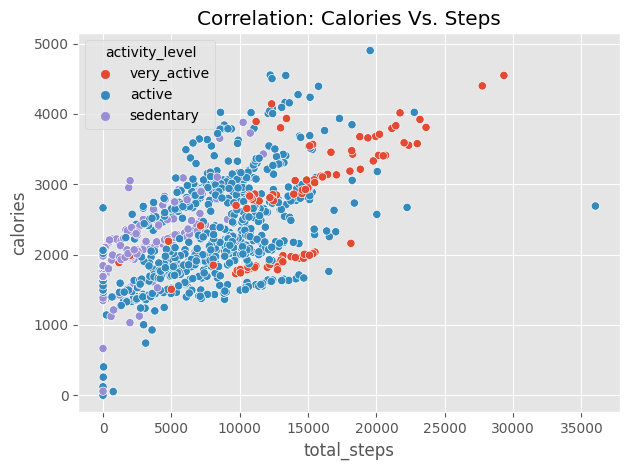

In [27]:
# Share
# Correlation between calories burnt and steps taken

ax = sns.scatterplot(x='total_steps', y='calories', data=df, hue=df['activity_level'])

plt.title('Correlation: Calories Vs. Steps')

plt.tight_layout()
plt.show()


On average, participants burnt more calories as they took more steps.

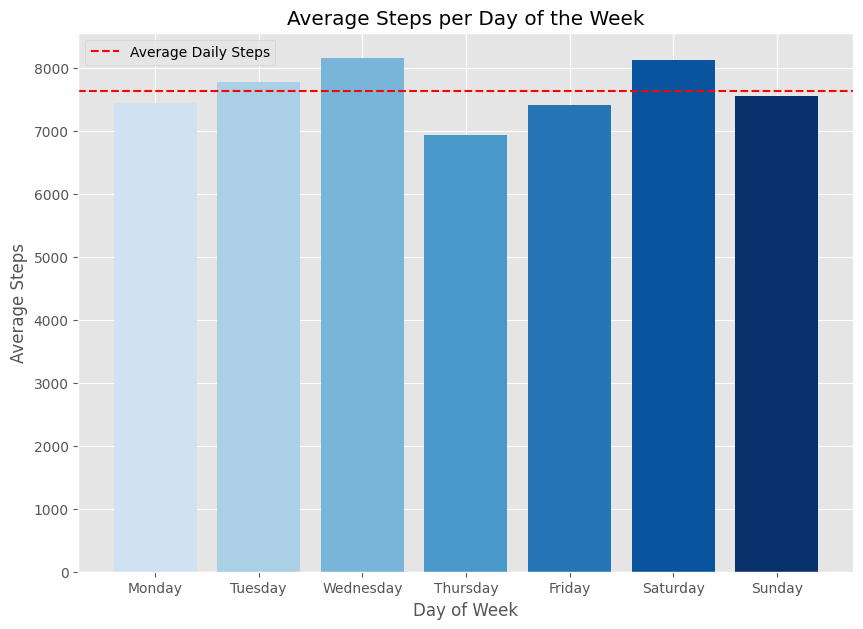

In [28]:
# Average steps per day

day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a gradient of blue colors
num_colors = len(day_of_week)
colors = plt.cm.Blues(np.linspace(0.2, 1, num_colors)) 

fig, ax = plt.subplots(1,1,figsize=(10,7))

day_group  = df.groupby(['day_of_week'])
average_daily_steps = day_group['total_steps'].mean()
average_steps = df['total_steps'].mean()

plt.bar(average_daily_steps.index, average_daily_steps, color=colors)

ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)

# Add overall average line
plt.axhline(average_steps, color='r', linestyle='--', label='Average Daily Steps')

# Labeling the plot
plt.xlabel('Day of Week')
plt.ylabel('Average Steps')
plt.title('Average Steps per Day of the Week')
plt.legend()

# Display the plot
plt.show()

On Thursday participants took the least amount of steps (on average) whilst on Wednesday and Saturday participants took more steps (on average). Thursday and Friday are the least active days while Saturday and Wednesday are very active.

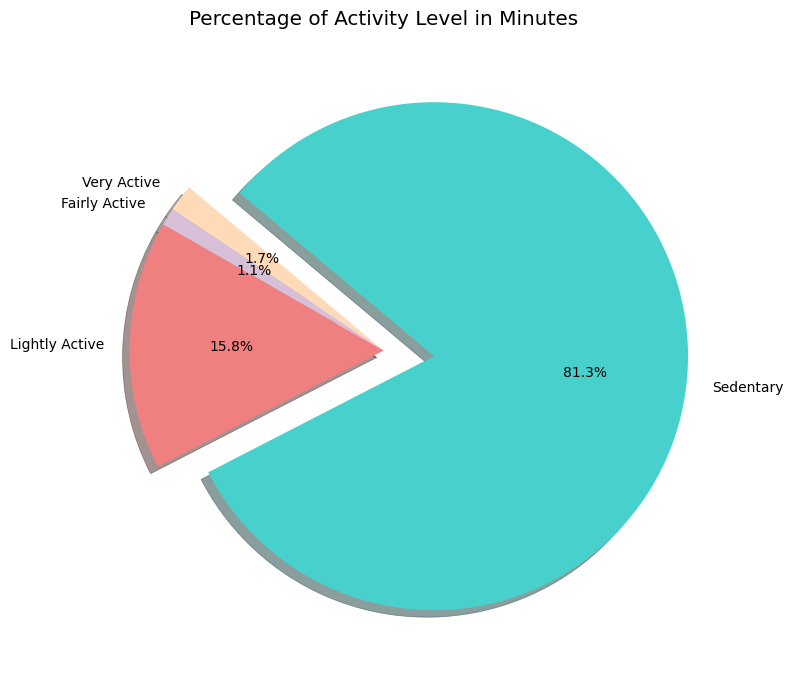

In [29]:
# Percentage of activity in minutes

very_active_mins = df['very_active_minutes'].sum()
fairly_active_mins = df['fairly_active_minutes'].sum()
lightly_active_mins = df['lightly_active_minutes'].sum()
sedentary_mins = df['sedentary_minutes'].sum()

colors = ['peachpuff', 'thistle', 'lightcoral', 'mediumturquoise']

slices = [very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins]
labels = ['Very Active', 'Fairly Active', 'Lightly Active', 'Sedentary']
explode = [0,0,0,0.2] # Explode only the 'Sedentary' slice

plt.figure(figsize=(8, 8))
plt.pie(slices, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)

# Adding title
plt.title('Percentage of Activity Level in Minutes')

# Display the plot
plt.tight_layout()
plt.show()

81% of the time participants are being sedentary and only 1.7% of time participants are being very active. The device could be tracking the activity during the night (while participants sleep) and makes it not fair to target some participants as "lazy."

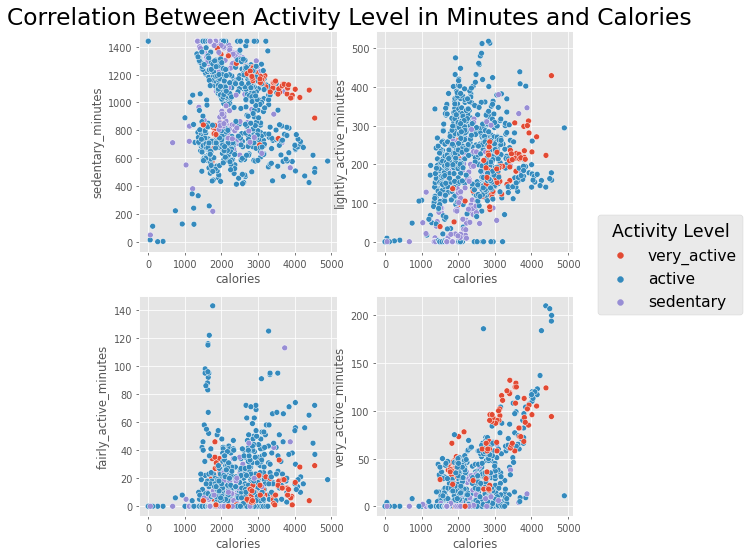

In [30]:
# Correlation between activity level in minutes and calories

n_day_of_week = [0,1,2,3,4,5,6]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 9), dpi=70)

sns.scatterplot(data=df, x='calories', y='sedentary_minutes', hue='activity_level', ax=axes[0, 0], legend=False)
sns.scatterplot(data=df, x='calories', y='lightly_active_minutes', hue='activity_level', ax=axes[0, 1], legend=False)
sns.scatterplot(data=df, x='calories', y='fairly_active_minutes', hue='activity_level', ax=axes[1, 0], legend=False)
sns.scatterplot(data=df, x='calories', y='very_active_minutes', hue='activity_level', ax=axes[1, 1], legend=True)

plt.legend(title = 'Activity Level', fontsize = 16, title_fontsize = 18, bbox_to_anchor = (1.9, 1.4), frameon=True, scatterpoints=1)

fig.suptitle('Correlation Between Activity Level in Minutes and Calories',x=0.5,y=0.92,fontsize=24)
plt.show()